In [1]:
# Import modules
import os
import datetime
from IPython.display import display
import math
import re


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import scipy
import scipy.stats

from utilities import *
import hedge_functions

In [2]:
# Setup utilities and and data path
datadir = os.path.join('..', 'data')

In [3]:
## Select data to analyze
files = ['isx2008C.xls', 'isx2010C.xls']
filename = os.path.join(datadir, files[1])

# Read all sheets into a dictonary with sheet names as keys
data = pd.read_excel(filename, sheet_name=None)

In [4]:
sheet_names = list(data.keys())
sheet_name = 'isx15012010C'

sheet, (mat, T, S, Cobs, E, r) = get_sheet(data, sheet_name)
n,m = Cobs.shape

sheet

,mat,0.34,0.345,0.35,0.355,0.36,0.365,0.37,0.375,0.38,...,0.545,0.55,0.555,0.56,0.565,0.57,s_price,r,date,time
mat,,,,,,,,,,,,,,,,,,,,,
86,86,0.15220,NaN,NaN,NaN,0.13260,NaN,NaN,NaN,0.11320,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49134,0.0011,2009-09-21,0.341270
85,85,0.15505,NaN,NaN,NaN,0.13535,NaN,NaN,NaN,0.11590,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49435,0.0011,2009-09-22,0.337302
84,84,0.15240,NaN,NaN,NaN,0.13270,NaN,NaN,NaN,0.11330,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49036,0.0011,2009-09-23,0.333333
83,83,0.14700,NaN,NaN,NaN,0.12725,NaN,NaN,NaN,0.10805,...,NaN,NaN,NaN,NaN,NaN,NaN,0.48699,0.0011,2009-09-24,0.329365
82,82,0.14555,NaN,NaN,NaN,0.12595,NaN,NaN,NaN,0.10675,...,NaN,NaN,NaN,1.525000,NaN,NaN,0.48411,0.0011,2009-09-25,0.325397
81,81,0.15280,NaN,NaN,NaN,0.13290,NaN,NaN,NaN,0.11350,...,NaN,NaN,NaN,0.001830,NaN,NaN,0.49169,0.0011,2009-09-28,0.321429
80,80,0.15045,NaN,NaN,NaN,0.13075,NaN,NaN,NaN,0.11125,...,NaN,NaN,NaN,0.001550,NaN,NaN,0.49025,0.0011,2009-09-29,0.317460
79,79,0.14965,NaN,NaN,NaN,0.12995,NaN,NaN,NaN,0.11060,...,NaN,NaN,NaN,0.001480,NaN,NaN,0.48835,0.0011,2009-09-30,0.313492
78,78,0.13870,NaN,NaN,NaN,0.11925,NaN,NaN,NaN,0.10025,...,NaN,NaN,NaN,0.001000,NaN,NaN,0.47671,0.0011,2009-01-10,0.309524


In [240]:
%matplotlib inline 

def get_closest_strike(estimate, strikes):
        """
        Return the strike price closest to given estimate
        """
        return strikes[(np.abs(strikes - estimate)).argmin()]
    
def hedge(ymat, strike, premium, r):
    """
    Dummy funciton
    """
    return strike - premium

def simulate(sheet, strikes, step=1, maturity=45, diff=0, sigma=0.1):
    """
    Simulate hedging for estimated costs accuracy of hedging
    
    Params:
        sheet (pd.DataFrame): worksheet to hedge
        strikes (pd.Series):  strike prices for convinience
        step (int):           number of days between hedges
        maturity (int):       number of days to maturity when starting hedging
        diff (int):           difference between spot and strike prices
                              = 0 for ATM-option
                              < 0 for out-of-the-money option
                              > 0 for in-the-money option
    Returns:
        errors (pd.Series)
        MSE (float)
        costs (float)
    """
    
    rows = sheet[sheet.index <= maturity] # start from selected maturity
    
    hedge_rows = rows.iloc[::step, :] # select days to rehedge
    
    # select spot price on t0
    spot_t0 = rows.s_price.iloc[0] 
    
    # select option with ATM strike on t0
    strike = get_closest_strike(spot_t0 + diff, strikes) 
    #strike = 0.510
    
    def call_hedge(row):
        """
        Helper function to apply on all rows
        """
        ymat = row.time
        r = row.r
        spot = row.s_price        
        premium = row[row.index.get_loc(strike)]
        
        sigma = hedge_functions.calculate_implied_volatility_bs(
            ymat, strike, spot, r, premium)
        return hedge_functions.delta_hedge(ymat, strike, spot, r, sigma)

    delta = hedge_rows.apply(call_hedge, axis=1)
    delta = delta.reindex(rows.index).fillna(method='ffill')
    
    v_op = rows[strike]
    dv_op = (v_op - v_op.shift(1))
    
    v_re = delta/100 * rows.s_price
    dv_re = (v_re - v_re.shift(1))
    
    A = dv_re - dv_op
    
    ddelta = delta - delta.shift(1)
    
    df = pd.DataFrame({
        'delta': delta,
        'spot': rows.s_price,
        'v_op': v_op,
        'dv_op': dv_op,
        'v_re': v_re,
        'dv_re': dv_re,
        'A': A,
        'ddelta': ddelta
    }, index=rows.index)
    
    #return A, MSE, costs, nstocks, v_option, v_portfolio, rows
    return df


,MSE,costs
2,0.012996,0.001824
4,0.012127,0.000954
6,0.012084,0.000639
8,0.011207,0.000492
10,0.011032,0.000519
12,0.011190,0.000368


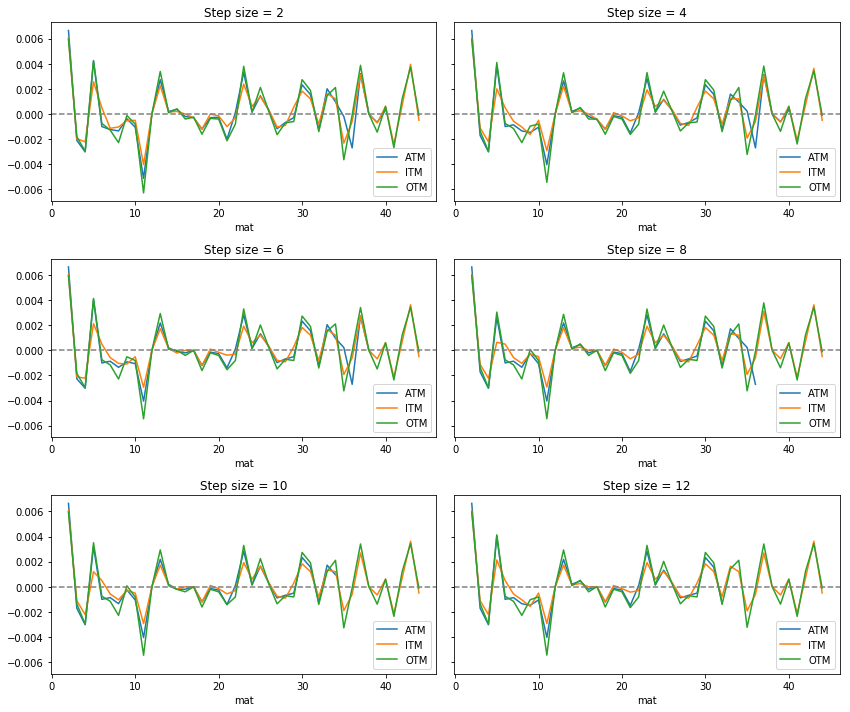

In [249]:

hedge_freq = [2, 4, 6, 8, 10, 12]
num_sim = len(hedge_freq)

fig, axes = plt.subplots(math.ceil(num_sim / 2),2,figsize=(12,10), sharey=True)

MSE = np.zeros(num_sim)
costs = np.zeros(num_sim)

for i, (ax, freq) in enumerate(zip(axes.flat, hedge_freq)):
    
    df_atm = simulate(sheet, E, step=freq, diff=0)
    df_atm.plot(y='A', ax=ax, label='ATM')
    
    df_itm = simulate(sheet, E, step=freq, diff=0.006)
    df_itm.plot(y='A', ax=ax, label='ITM')
    
    df_otm = simulate(sheet, E, step=freq, diff=-0.006)
    df_otm.plot(y='A', ax=ax, label='OTM')
    
    ax.axhline(y=0, linestyle='dashed', color='grey')
    ax.set_title('Step size = {}'.format(freq))
    
    MSE[i] = np.sqrt(df_atm.A.pow(2).sum())
    
    unit_cost = 0.0015
    costs[i] = df_atm.ddelta.abs().sum() * unit_cost

fig.tight_layout()
    
stats = pd.DataFrame(
    {
    'MSE': MSE,
    'costs': costs
    },
    index=hedge_freq
)

display(stats)

In [253]:
df = simulate(sheet, E, step=1, diff=0)


df.ddelta.abs().sum()
# rows = sheet[sheet.index <= 45] # start from selected maturity
    
# hedge_rows = rows.iloc[::3, :] # select days to rehedge

# # select spot price on t0
# spot_t0 = rows.s_price.iloc[0] 

# # select option with ATM strike on t0
# #strike = get_closest_strike(spot_t0 - diff, strikes) 
# strike = 0.510

# rows[strike]

1.4602084387303857